<a href="https://colab.research.google.com/github/romanowiczadam/ml_course/blob/master/10_decision_tree_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import make_regression

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True)
sns.set(font_scale=1.3)
sklearn.__version__

'0.22.2.post1'

In [3]:
data, target = make_regression(n_samples=200, n_features=1, noise=20)
target = target ** 2

print(data)
print(target)

[[ 1.852278]
 [ 0.473592]
 [-1.230864]
 [ 0.625667]
 [-0.07201 ]
 [ 0.812526]
 [-0.185659]
 [-0.81581 ]
 [ 0.06023 ]
 [ 0.656554]
 [ 2.463242]
 [ 1.003533]
 [-0.264657]
 [-0.234587]
 [-0.562288]
 [ 0.296985]
 [ 0.087047]
 [ 1.453534]
 [-0.974682]
 [-1.412304]
 [-0.503476]
 [-0.077102]
 [ 0.385317]
 [-1.401851]
 [-0.072829]
 [ 0.341152]
 [ 0.821903]
 [-0.446515]
 [-0.469474]
 [ 1.865775]
 [-1.424748]
 [-0.601707]
 [ 0.822545]
 [-0.463418]
 [ 0.963376]
 [ 1.52303 ]
 [-0.52976 ]
 [-1.320457]
 [-0.990536]
 [ 0.153725]
 [-0.013497]
 [ 1.031   ]
 [ 0.751933]
 [ 1.477894]
 [ 0.174578]
 [-1.245739]
 [ 0.208864]
 [-0.820682]
 [ 0.171368]
 [-0.908024]
 [ 0.521942]
 [-1.607483]
 [ 0.196861]
 [ 0.005113]
 [-0.309212]
 [ 1.142823]
 [-0.566298]
 [ 0.975545]
 [-1.415371]
 [-0.783253]
 [ 0.29612 ]
 [-1.236951]
 [ 0.738467]
 [ 0.013002]
 [ 0.54256 ]
 [-0.680025]
 [ 0.241962]
 [ 0.361396]
 [ 0.473833]
 [-0.301104]
 [ 0.293072]
 [ 0.714   ]
 [-0.883857]
 [-0.714351]
 [-0.245388]
 [-1.196207]
 [-1.724918]

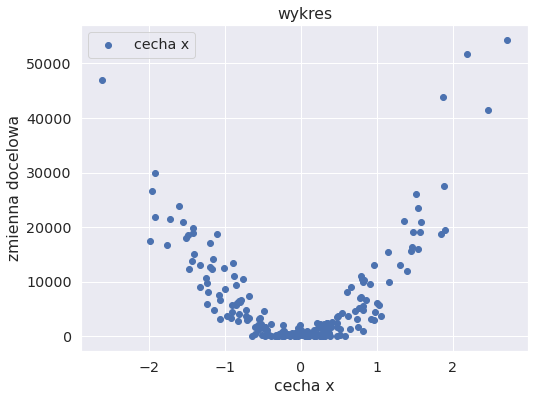

In [12]:
plot_data = np.arange(-3, 3, 0.01).reshape(-1, 1)

plt.figure(figsize=(8, 6))
plt.title('wykres')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.legend()
plt.show() 

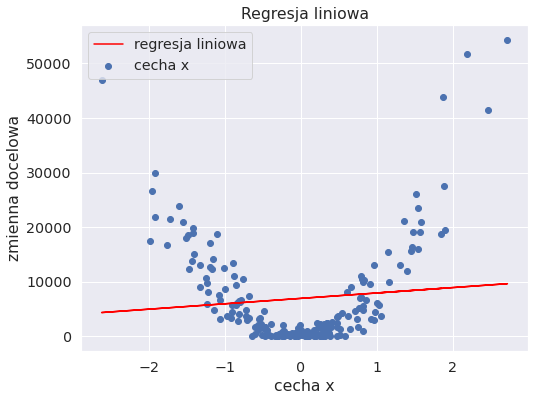

In [7]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(data, target)
target_pred_lin = regressor.predict(data)

plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(data, target_pred_lin, c ='red', label='regresja liniowa')
plt.legend()
plt.show() 

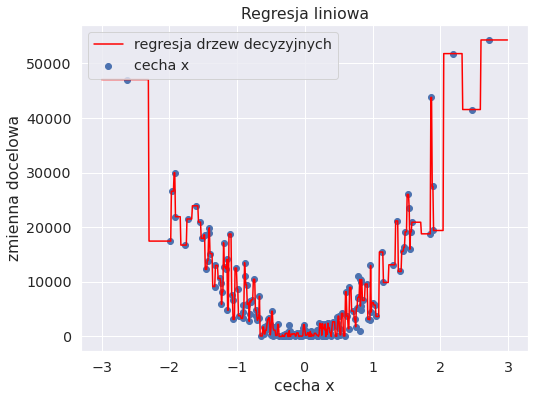

In [14]:
# drzewo przeuczone
from sklearn.tree import DecisionTreeRegressor

regressor_2 = DecisionTreeRegressor()
regressor_2.fit(data, target)


plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(plot_data, regressor_2.predict(plot_data), c ='red', label='regresja drzew decyzyjnych')
plt.legend()
plt.show() 

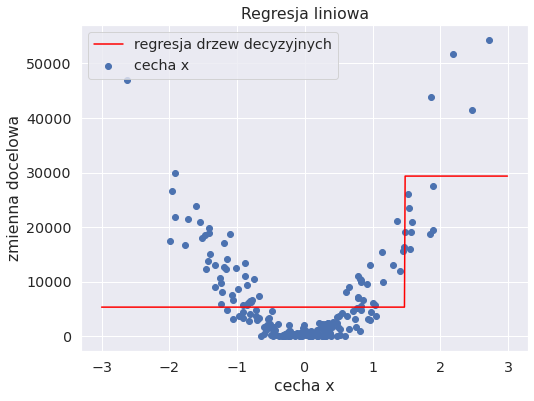

In [17]:
# głębokośc drzewa = 1
max_depth = 1
regressor_3 = DecisionTreeRegressor(max_depth=max_depth)
regressor_3.fit(data, target)


plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(plot_data, regressor_3.predict(plot_data), c ='red', label='regresja drzew decyzyjnych')
plt.legend()
plt.show()

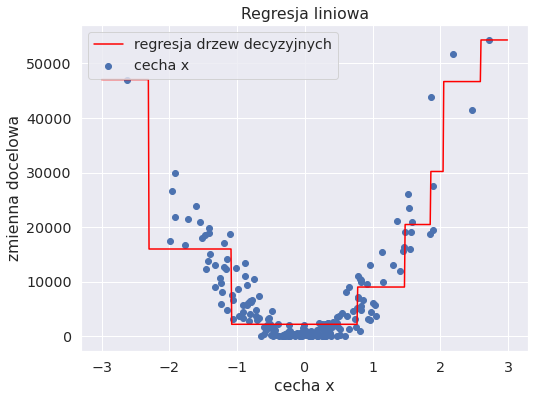

In [18]:
#głębokośc drzewa = 3
max_depth = 3
regressor_3 = DecisionTreeRegressor(max_depth=max_depth)
regressor_3.fit(data, target)


plt.figure(figsize=(8, 6))
plt.title('Regresja liniowa')
plt.xlabel('cecha x')
plt.ylabel('zmienna docelowa')
plt.scatter(data, target, label='cecha x')
plt.plot(plot_data, regressor_3.predict(plot_data), c ='red', label='regresja drzew decyzyjnych')
plt.legend()
plt.show()

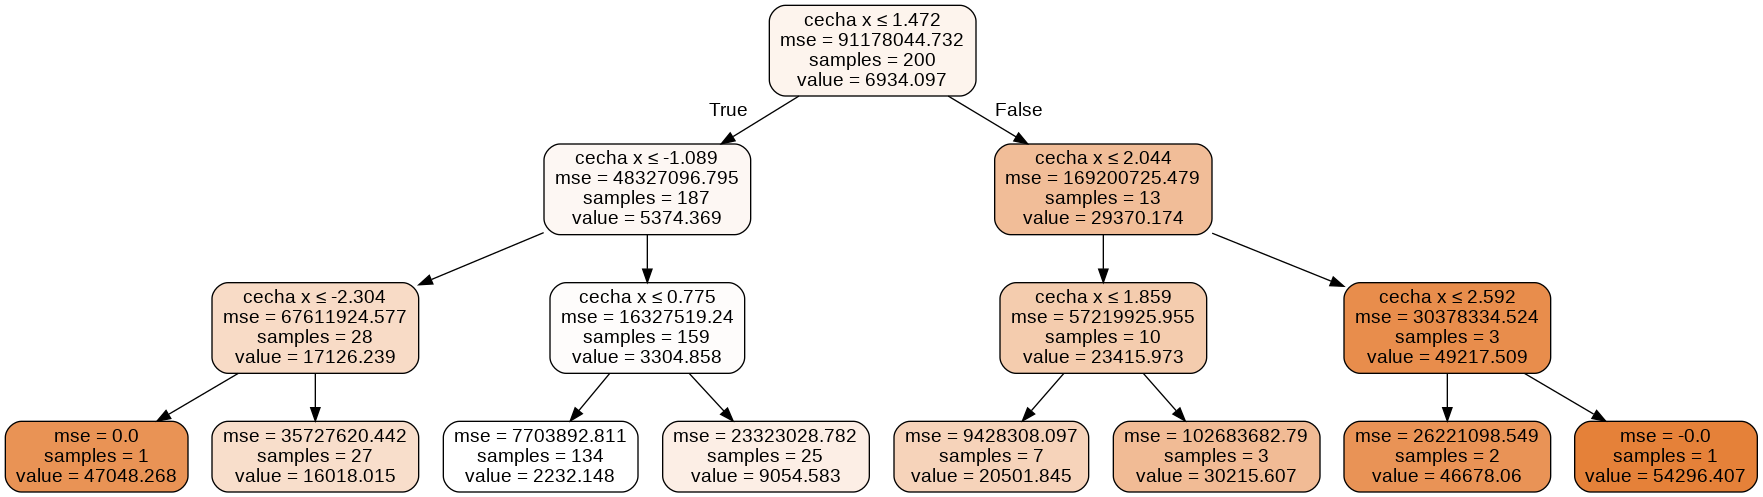

In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(regressor_3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=['cecha x'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')

Image(graph.create_png(), width=600)